# Importação de bibliotecas

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
random.seed(42)

# Funções

In [ ]:
# Criação de distâncias aleatórias para cada cidade
def criar_distancias(num_cidades):
    # Cria a matriz de distâncias com 0: distância para si mesma e random: distância entre as vizinhas
    matriz = [[0 if i == j else random.randint(10, 100) for j in range(num_cidades)] for i in range(num_cidades)]

    # Preenche a matriz simetricamente
    for i in range(num_cidades):
        for j in range(i + 1, num_cidades):
            matriz[j][i] = matriz[i][j]

    return matriz

In [ ]:
def calcular_custo(rota, distancias):
    custo = 0

    # Percorre a rota até a penúltima cidade
    for i in range(len(rota) - 1):
        custo += distancias[rota[i]][rota[i + 1]]

    # Adiciona a distância do retorno à cidade inicial
    custo += distancias[rota[-1]][rota[0]]

    return custo

In [ ]:
# Cria conjunto de rotas possíveis
def gerar_populacao_inicial(num_cidades, tamanho_populacao):
    cidades = list(range(1, num_cidades))

    # Gera população inicial com rotas aleatórias para cada indivíduo
    return [random.sample(cidades, len(cidades)) for _ in range(tamanho_populacao)]

In [ ]:
def torneio(populacao, fitness, k=3):
    # Seleciona aleatoriamente 'k' indivíduos
    selecionados = random.sample(range(len(populacao)), k)

    # Índice do indivíduo com o menor valor fitness
    melhor = min(selecionados, key=lambda i: fitness[i])

    return populacao[melhor]

In [ ]:
def cruzamento(rota1, rota2):
    tamanho = len(rota1)

    # Seleciona dois pontos de corte dentro da rota
    p1, p2 = sorted(random.sample(range(tamanho), 2))
    filho = [None] * tamanho
    filho[p1:p2] = rota1[p1:p2]  # Copia uma parte da rota1 para o filho

    # Preenche as posições restantes com cidades da rota2
    posicao = p2
    for cidade in rota2:
        if cidade not in filho:
            if posicao >= tamanho:
                posicao = 0
            filho[posicao] = cidade
            posicao += 1

    # Retorna a rota gerada pelo cruzamento
    return filho

In [ ]:
def mutacao(rota):
    # Seleciona 2 índices aleatórios dentro da rota
    i, j = random.sample(range(len(rota)), 2)

    # Troca os valores das posições i e j na rota
    rota[i], rota[j] = rota[j], rota[i]

In [ ]:
def criar_grafo(distancias):
    G = nx.Graph()
    num_cidades = len(distancias)

    # Adiciona arestas com as distâncias entre as cidades
    for i in range(num_cidades):
        for j in range(i + 1, num_cidades):
            G.add_edge(i, j, weight=distancias[i][j])   # Insere aresta com o peso (distância)

    return G

In [ ]:
def plotar_tabela_distancias(distancias):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('tight')
    ax.axis('off')
    table_data = np.array(distancias)
    ax.table(
        cellText=table_data,
        colLabels=[f'Cidade {i}' for i in range(len(distancias))],
        loc='center',
        cellLoc='center',
        colColours=['#f5f5f5'] * len(distancias)
    )

    plt.show()

In [ ]:
def sublinhar_melhor_caminho(G, melhor_rota):
    melhor_rota_completa = [0] + melhor_rota + [0]

    # Lista de arestas que compõem o melhor caminho
    edges_melhor_rota = [(melhor_rota_completa[i], melhor_rota_completa[i + 1]) for i in range(len(melhor_rota_completa) - 1)]

    return edges_melhor_rota

# Aplicação do algoritmo evolutivo

In [ ]:
def algoritmo_genetico(num_cidades, tamanho_populacao, geracoes, taxa_mutacao):
    # Gera matriz de distâncias entre cidades
    distancias = criar_distancias(num_cidades)

    # Inicializa a população e variáveis para armazenar a melhor solução
    populacao = gerar_populacao_inicial(num_cidades, tamanho_populacao)
    melhor_rota = None
    menor_custo = float('inf')

    for geracao in range(geracoes):
        # Calcula o custo de cada rota na população atual
        fitness = [calcular_custo([0] + rota, distancias) for rota in populacao]
        nova_populacao = []

        # Elitismo: preserva o melhor indivíduo da geração
        melhor_da_geracao = populacao[fitness.index(min(fitness))]
        if min(fitness) < menor_custo:
            menor_custo = min(fitness)
            melhor_rota = melhor_da_geracao
        nova_populacao.append(melhor_da_geracao)

        # Geração da nova população com cruzamento e mutação
        while len(nova_populacao) < tamanho_populacao:
            pai1 = torneio(populacao, fitness)
            pai2 = torneio(populacao, fitness)
            filho = cruzamento(pai1, pai2)
            if random.random() < taxa_mutacao:
                mutacao(filho)
            nova_populacao.append(filho)

        populacao = nova_populacao

    return melhor_rota, menor_custo, distancias


# Parâmetros do algoritmo
num_cidades = 6
tamanho_populacao = 20
geracoes = 100
taxa_mutacao = 0.2

melhor_rota, menor_custo, distancias = algoritmo_genetico(num_cidades, tamanho_populacao, geracoes, taxa_mutacao)


# Resultados

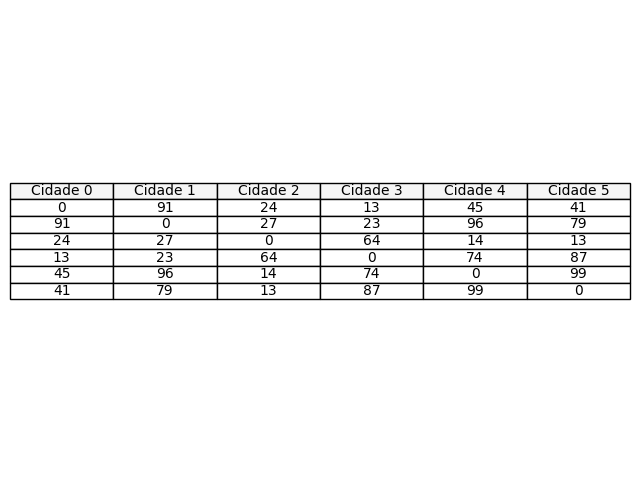

In [ ]:
plotar_tabela_distancias(distancias)

In [ ]:
print("Melhor rota encontrada:", [0] + melhor_rota)
print("Custo da melhor rota:", menor_custo)

Melhor rota encontrada: [0, 3, 1, 5, 2, 4]
Custo da melhor rota: 187


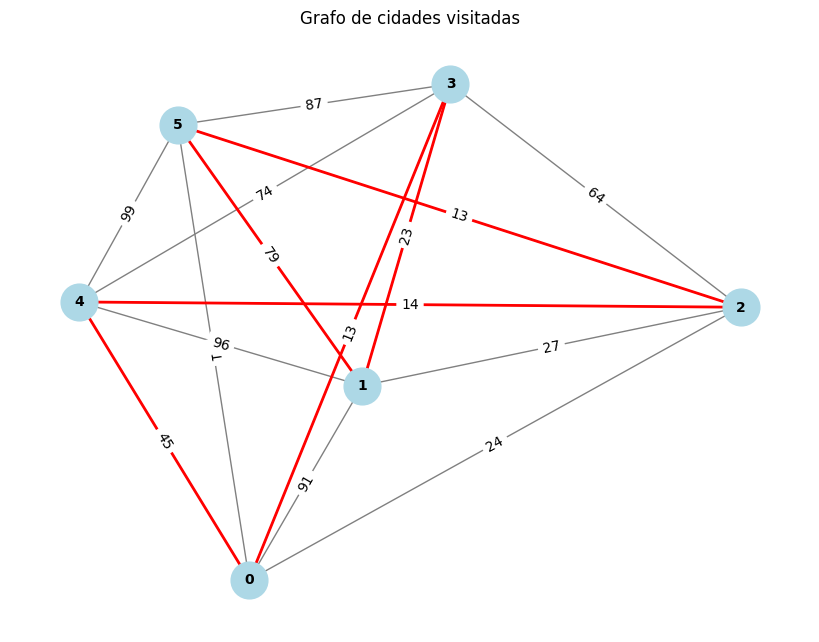

In [ ]:
G = criar_grafo(distancias)

pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))

nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
edges_melhor_rota = sublinhar_melhor_caminho(G, melhor_rota)
nx.draw_networkx_edges(G, pos, edgelist=edges_melhor_rota, edge_color='red', width=2)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Grafo de cidades visitadas")
plt.show()